Problema 1:
Paso 1.
En este paso primero analizamos la siguiente lista de materiales:
Para resolver este modelo debemos entender primeramenet que se nos pide analizar el funcionamiento de una ecuación diferencial ordinaria que describe la velocidad de objeto en caída libre, sujeto a una velocidad máxima o terminal debido ala fricción con el fluido del medio. Debemos encontrar una serie de pasos iniciales como se enumeran a continuación.
-Sabemos como ejecutar el metodo de Runge-Kutta cuarto orden con la librería de Scipy
-Entendemos la solución se trata de una aproximación numérica que puede ser comparada con la solución analítica que se puede resolver con la solución de una ecuación diferencial lineal ordinaria de primer orden.
-Definimos las variables dadas para la solución del problema.
El código es visto ante las complicaciones de la comparación con la analítica. Iterar o depurar el código en soluciones tan delicadas puede llevar a un camino largo y tedioso.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

#Definimos las constantes del problema en esta sección del cuaderno donde se pueden cambiar o iterar para su funcionamiento.
pf = 7.874 #(g/cm^3)
p = 1.26 #(g/cm^3)
g = 9.8 #(m/s^2)
a = 10 #(s^1)

Paso 2.
Dentro del lenguaje de programación de Python existe la posibilidad de implementar Scipy.integrate.solve_ivp(), sabemos que posiblemente existan más bibliotecas capaces de realizar el procedimiento de Runge-Kutta de cuarto orden, sin embargo utilizamos las bibliotecas estandar, que son Scipy y Numpy. donde se puede seleccionar el metodo de Runge-Kutta 4 por la ejecución de 'RK45'. Utilizamos esta función para resolver la ecuación diferencial. Definimos la ecuación y una función que será utilizada para resolver la ecuación diferencial dada basado en los parametros seleccionados por el usuario. Los resultados serán retornados en una lista o arreglo de la librería numpy que se puede utilizar para realizar procedimientos matemáticos de manera más cómoda. Para esta solución al ser numérica se debe graficar y comparar con la solución analítica para poder ser analizada.

In [2]:
#Definimos la ecuación diferencial ordinaria a resolver.
def EDO(t, y):
    '''

    :param t: parametro necesario para solve_ivp, no es utilizado en este caso
    :param y: parametro de velocidad para la solucion de la EDO
    :return: Ecuacion devuelve el resutado de la ecuacion diferencial ordinaria evaluada.
    '''
    result = ((p - pf) * g / p) - a * y
    return result

#Por medio de la ejecución de esta función se resuelve la ecuación diferencial EDO.
def solveEDO(t0, v0, tLimit, h):
    '''

    :param t0: tiempo inicial el valor numerico
    :param v0: valor de la velocidad en el tiempo inicial indicado
    :param tLimit: parametro evalua hasta donde se detiene la evaluacion numerica
    :param h: paso de iteracion para solucion numerica de EDO
    :return: una lista con los valores numericos de la EDO resulta
    '''
    resultado = integrate.solve_ivp(fun = EDO, method ='RK45', t_span = (t0, tLimit), y0 = [v0,], t_eval = np.arange(t0, tLimit, h))
    return resultado.y[0]


Paso 3.
Al ejecutar el plan ejecutamos las funciones programadas para la solución del problema. Por otro lado guardamos las soluciones en los puntos deseados en dos variables que convenientemente llamaremos v y t. Para la solución analítica programamos otra función y la ejecutamos en los mismos puntos donde se analiza la solución numérica de Runge-Kutta 45. Esta solución analítica se guardará en la variable que será llamada vAnalitica0.

In [3]:
#Por medio de las siguientes variables guardamos los parametros donde se haran listas de los resultados tanto de el dominio temporal como la velocidad
t = np.arange(0, 1, 0.05)
v = solveEDO(0, 0, 1, 0.05)

#Por medio de la siguiente funcion encontramos la solucion analitica evaluada en los mismos puntos del dominio temporal
def vAnalitica(t):
    '''

    :param t: parametro de la lista de valores en arreglo Numpy para evaluar por medio de la ecuacion analitica de la solucion
    :return: valor del resultado analitico para la ecuacion dada por la velocidad
    '''
    resultado = (7.874-1.26) * np.exp(-10*t) - (7.874-1.26)
    return resultado

vAnalitica0 = vAnalitica(t)

Paso 4.
Notamos en primer lugar la gran similitud al analizar la gráfica que lleva tanto la solución analítica como la numérica pero como difieren hacia el final de la gráfica, existe la posibilidad que ambas soluciones hayan llegado a una asintota distinta o velocidad terminal distinta lo que sugiere más que un error con nuestro metodo, un error en nuestros valores de entrada de solución. Agregamos como comentario que esta ecuación diferencial puede ser ampliada a cambios de varios tipos que aproximamos. Por ejemplo el cambio de la densidad en base al cambio de la gravedad en base a la altura recorrida, el hecho de tomar en cuenta que el objeto es completamento esférico para que se acople a la ecuación. Diferentes formas de los objetos afectan de distintas maneras la fricción que puede ser distinta a alpha por la velocidad dada por la ecuación.

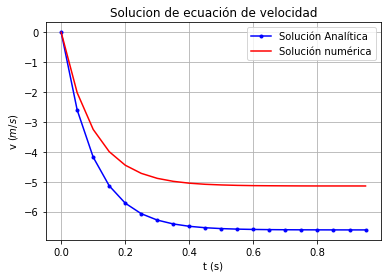

In [4]:
#Graficamos la la solucion analitica y numerica para comparar los resultados.
fig = plt.figure()
plt.plot( t, vAnalitica0, 'b.-', label="Solución Analítica")
plt.plot( t, v, 'r-', label="Solución numérica")
plt.xlabel("t (s)")
plt.ylabel("v $(m/s)$")
plt.grid(True)
plt.title("Solucion de ecuación de velocidad")
plt.legend(loc='upper right')
plt.show()

Problema 2.
Paso 1.
Para la solución de este problema identificamos como se trata de la solución al encontrar la densidad basada en la altura sin especificar datos especificos para el planeta pero dada la información que incluiremos en la solución se trata de planeta Tierra. Notamos que esto se trata de una Ecuación Diferencial ordinaria al evualuar una función en la otra. Vemos como la temperatura depende de la altura, la densidad depende de la temperatura, a su vez la altura y la misma presion y el cambio de presión depende de la densidad. Es decir la derivada respecto a la densidad depende de la misma densidad. Este ejercicio entonces se debe resolver por medio de una solución numérica con la que contamos con toda la información necesaria para modelar el mismo. Deseamos llegar a una gráfica donde la densidad dependa de la altura.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

#Definimos las constantes del problema en esta sección del cuaderno donde se pueden cambiar o iterar para su funcionamiento.
M = 0.0289647 #(kg/mol)
R = 8.314462 #(J/mol k)
g = 9.8 #(m/s^2)

Paso 2.
Para encontrar la solución de este problema de la densidad una vez entendido el objetivo de comparar los resultados analíticos y numéricos para una misma ecuación diferencial ordinaria entonces redactamos la siguiente lista que resume los puntos más importantes por completar.
-Definir las variables del problema con las unidades adecuadas para la comparación de resultados.
-Definir las ecuaciones que se deben usar para evaluar la EDO.
-Definir una función que logre resolver EDO.
-Guardar una lista del dominio espacial para evualuar solución numérica.
-Encontrar la solución analítica por medio de herramientas como Wolfram-Alpha.
-Encontrar la solución numérica en los mismos puntos del dominio espacial definidos.
-Guardar ambos resultados y graficarlos para su comparación.

In [6]:
#Definimos la temperatura en base a la altura
def T(y):
    '''

    :param y: Parametro de la altura a evaluar para temperatura
    :return: Devuelve un valor para la temperatura
    '''
    result = 293 - (y / 200)
    return result

#Definimos la función de la presión en base a la altura
def densidad(y, p):
    '''

    :param y: Parametro de la altura para encontrar el valor de la densidad
    :param p: Parametro de la presion para encontrar la densidad
    :return: Retorna valor numerico de la densidad
    '''
    temperatura = T(y)
    denominador = (R * temperatura)
    result = M * p / denominador
    return result

#Definimos la ecuación diferencial ordinaria a resolver.
def EDO2(y, p):
    '''

    :param y: Parametro altura que funcionara como x caundo sea evaluado por solve_ivp
    :param p: parametro de presion que funcionara como y cuando sea evauluado por solve_ivp
    :return: retorna el valor de la ecuacion diferencial ordinaria evualuada numericamente
    '''
    den = densidad(y, p)
    result = -den * g
    return result

#Por medio de la ejecución de esta función se resuelve la ecuación diferencial EDO.
def solveEDOAtm(y0, p0, yLimit, h):
    '''

    :param y0: parametro de altura inicila a evaluar
    :param p0: presion en la altura inicial dada
    :param yLimit: parametro de parada para la altura maxima a evaluar
    :param h: espacio entre iteracion de la solucion numerica de la ecuacion
    :return: retorna una lista de tipo Numpy con la solucion numerica para la EDO
    '''
    resultado = integrate.solve_ivp(fun = EDO2, method ='RK45', t_span = [y0, yLimit], y0 = [p0], t_eval = np.arange(y0, yLimit, h))
    return resultado.y[0]

Paso 3.
Para la preparación de este código el mayor desfío fue depurar el hecho que existiera una inconsistencia en las unidades dadas por el enunciado, fue importante notar este para corregir el factor multiplicador y encontrar un resultado que tuviese sentido según estimaciones encontradad en internet. Fue utilizada la biblioteca científica de Scipy para resolver el problema dado de EDO por el Runge-Kutta de cuarto orden. La solución analítica fue implementada por medio de una función que evalua y arroja el resultado necesitado. Esta solución es evaluada por medio de una lista de conjuntos en el dominio espacial donde se quiere tomar una mustra suficientemente densa para observar el comportamiento de la ecuación en límites definidos, mismos puntos son utilizados para encontrar la solución de numérica de la EDO. Todos estos resultados son guardados en listas para luego ser graficados.

In [7]:
#Guardamos los paramtetros del dominio espacial de altura y la presion en las listas respectivas a continuacion
y = np.arange(0, 3000, 100)
p = solveEDOAtm(0, 101325, 3000, 100)

def solAnalitica(y):
    '''

    :param y: altura a evaluar
    :return: la solucion analitica de la presion a la altura dada
    '''
    resultado = 2.82295 * 10**-28 * (58600 - y)**6.82796
    return resultado

#Guardamos la solucion analitica evaluada en el mismo dominio espacial en la siguiente lista
pAnalitica = solAnalitica(y)


Paso 4.
Primeramente notamos la gran similitud de resultados entre la solución analítica y la solución numérica. Practicamente indefiribles en la gráfica mostrada. Esto nos da una gran validez al método implementado. Es necesario analizar la gran semejanza incluso del modelo usado con datos experimentales promedio a alturas encontrados en la web. Existe claro formas de agregar cierta presición de más al modelo físico implementado como por ejemplo la variación de la gravedad segun altura y posición geográfica, variaciones de presión según clima, etc. Puede llegar a ser un proceso computacionalmente complejo que no valga la pena, ademas de caótico por lo que no asegura presición ilimitada.

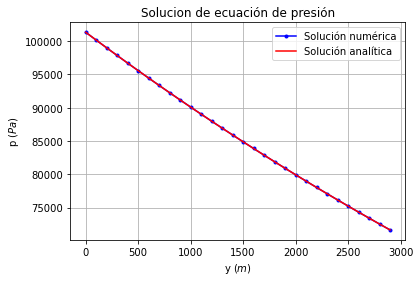

In [8]:
#Graficamos la la solucion analitica y numerica para comparar los resultados.
fig = plt.figure()
plt.plot( y, p, 'b.-', label="Solución numérica")
plt.plot( y, pAnalitica, 'r-', label="Solución analítica")
plt.xlabel("y $(m)$")
plt.ylabel("p $(Pa)$")
plt.grid(True)
plt.title("Solucion de ecuación de presión")
plt.legend(loc='upper right')
plt.show()